
# Análisis de Datos de Calificaciones y Tiempo de Estudio

Este notebook presenta un análisis exploratorio de datos y una regresión lineal aplicada a un conjunto de datos de calificaciones y horas dedicadas al estudio por estudiantes. El objetivo es explorar la relación entre el tiempo de estudio y el rendimiento académico.


In [99]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from IPython.display import display, Markdown
import statsmodels.api as sm

In [100]:
# Carga de datos

file_path = '../data/raw/datos.csv'
df = pd.read_csv(file_path)

print(df.describe())
df.head()

# Limpieza de datos

# Eliminación de valores nulos
df.dropna(subset=['horas_dedicadas', 'calificaciones_obtenida'], inplace=True)
df.head()

# Renombramiento

horas = df['horas_dedicadas']
calificaciones = df['calificaciones_obtenida']


       horas_dedicadas  calificaciones_obtenida
count        20.000000                18.000000
mean         99.400000                64.055556
std          58.129076                33.539217
min           2.000000                 0.000000
25%          50.000000                41.250000
50%          98.500000                70.000000
75%         154.500000                97.250000
max         178.000000               100.000000



## Análisis Exploratorio de Datos (EDA)

Calculamos estadísticas descriptivas básicas para entender la distribución de las horas dedicadas al estudio y las calificaciones obtenidas.


### Estadísticas Descriptivas de Horas Dedicadas

,Estadísticas de horas_dedicadas
count,18.000000
mean,108.000000
std,54.280318
min,18.000000
25%,52.750000
50%,112.500000
75%,159.500000
max,178.000000


### Estadísticas Descriptivas de Calificaciones Obtenidas

,Estadísticas de calificaciones_obtenida
count,18.000000
mean,64.055556
std,33.539217
min,0.000000
25%,41.250000
50%,70.000000
75%,97.250000
max,100.000000


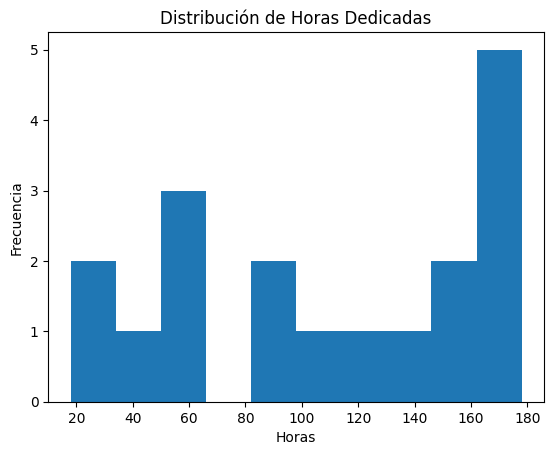

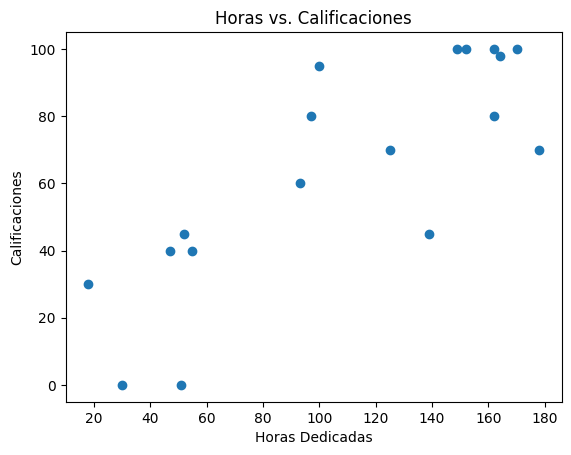

In [101]:
# Definimos una función para mostrar las estadísticas descriptivas
def display_descriptive_stats(dataframe, column_name):
    stats = dataframe[column_name].describe()
    stats_df = pd.DataFrame(stats)
    stats_df.columns = [f"Estadísticas de {column_name}"]
    return stats_df

# Mostramos las estadísticas descriptivas para 'horas_dedicadas'
display(Markdown("### Estadísticas Descriptivas de Horas Dedicadas"))
display(display_descriptive_stats(df, 'horas_dedicadas'))

# Mostramos las estadísticas descriptivas para 'calificaciones_obtenida', excluyendo NaN
display(Markdown("### Estadísticas Descriptivas de Calificaciones Obtenidas"))
display(display_descriptive_stats(df, 'calificaciones_obtenida'))

# Histograma de horas dedicadas
plt.hist(df['horas_dedicadas'])
plt.title('Distribución de Horas Dedicadas')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre horas y calificaciones
plt.scatter(df['horas_dedicadas'], df['calificaciones_obtenida'])
plt.title('Horas vs. Calificaciones')
plt.xlabel('Horas Dedicadas')
plt.ylabel('Calificaciones')
plt.show()



## Regresión Lineal

Realizamos una regresión lineal para analizar la relación entre las horas dedicadas al estudio y las calificaciones obtenidas.


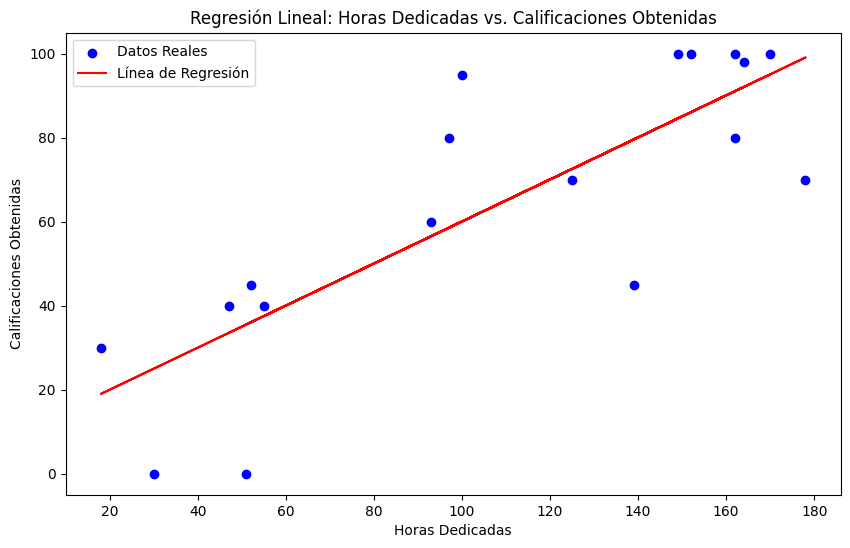

(365.1070918886464, 0.6563328585151595)

In [102]:
# Preparación de datos para el modelo
x = np.array(horas).reshape(-1,1)
y = np.array(calificaciones)

regressor = LinearRegression()
regressor.fit(x, y)
prediction = regressor.predict(x)
mse = mean_squared_error(y, prediction)
r2 = r2_score(y, prediction)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Datos Reales')
plt.plot(x, prediction, color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Horas Dedicadas vs. Calificaciones Obtenidas')
plt.xlabel('Horas Dedicadas')
plt.ylabel('Calificaciones Obtenidas')
plt.legend()
plt.show()

(mse, r2)


El análisis de regresión lineal muestra que hay una relación positiva entre el número de horas dedicadas y las calificaciones obtenidas. La línea de regresión, representada en el gráfico, ilustra cómo se espera que aumenten las calificaciones a medida que se incrementa el número de horas dedicadas al estudio..

## Predicción de Calificación Basada en Horas Dedicadas

Utilizando el modelo de regresión lineal desarrollado previamente, podemos predecir la calificación esperada para un número específico de horas dedicadas al estudio. Este análisis nos permite entender el impacto estimado del tiempo de estudio en el rendimiento académico.

Consideraremos un caso hipotético en el que queremos predecir la calificación de un estudiante que ha dedicado un número de horas igual a la suma de los dígitos de su número de cuenta módulo 50.


In [103]:
# Suponiendo que 'n_horas' es la suma de los dígitos del número de cuenta módulo 50
# Aquí se utiliza un valor hipotético generado para 'n_horas'.
n_horas = np.random.randint(0, 181) 

# Realizando la predicción utilizando el modelo de regresión lineal
calificacion_predicha = regressor.predict([[n_horas]])

print(f"La calificación predicha para un estudiante que dedicó {n_horas} horas es: {calificacion_predicha[0]:.2f}")


La calificación predicha para un estudiante que dedicó 75 horas es: 47.54


## Evaluación de la Bondad de Ajuste del Modelo

Para determinar la efectividad de nuestro modelo de regresión lineal en explicar las calificaciones obtenidas, evaluaremos la bondad de ajuste utilizando el coeficiente de determinación, conocido como \(R^2\). Este coeficiente cuantifica la proporción de la variabilidad en la variable dependiente que es predecible a partir de la variable independiente.


R-squared (Coeficiente de Determinación): 0.6563328585151595
SEE (Error Estándar de la Estimación): 20.26685664760885


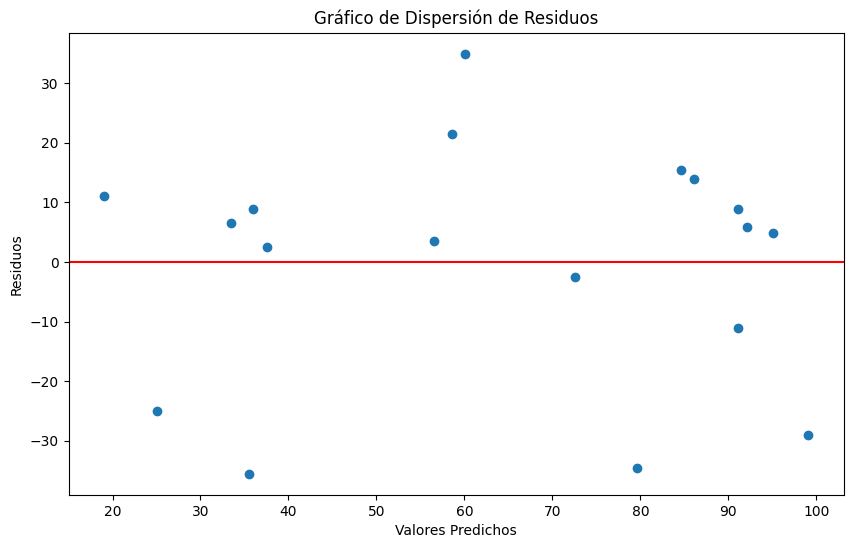

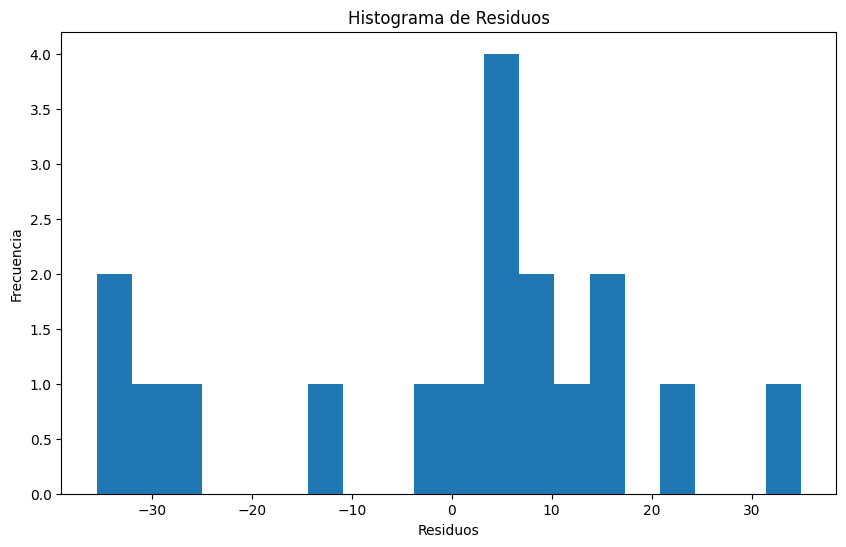

Resumen del Modelo:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     30.56
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           4.59e-05
Time:                        01:38:54   Log-Likelihood:                -78.643
No. Observations:                  18   AIC:                             161.3
Df Residuals:                      16   BIC:                             163.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9930     10.884

/home/shaman/.cache/pypoetry/virtualenvs/machine-learning-3DbA06_O-py3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


In [104]:
# Ajuste del Modelo de Regresión Lineal con Statsmodels
X_sm = sm.add_constant(x) # Añade una constante al modelo
modelo = sm.OLS(y, X_sm).fit()

# Coeficiente de Determinación (R²)
print("R-squared (Coeficiente de Determinación):", modelo.rsquared)

# Error Estándar de la Estimación (SEE)
print("SEE (Error Estándar de la Estimación):", np.sqrt(modelo.scale))

# Análisis de Residuos
# Gráfico de dispersión de residuos
plt.figure(figsize=(10, 6))
plt.scatter(modelo.predict(), modelo.resid)
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Dispersión de Residuos')
plt.show()

# Histograma de residuos
plt.figure(figsize=(10, 6))
plt.hist(modelo.resid, bins=20)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

# Pruebas de Hipótesis para los Coeficientes
print("Resumen del Modelo:")
print(modelo.summary())


## Conclusión

Este análisis proporciona una visión sobre cómo el tiempo dedicado al estudio puede influir en las calificaciones obtenidas. El modelo de regresión lineal indica que hay una relación moderada entre el número de horas dedicadas y el rendimiento académico. Futuras investigaciones podrían explorar la influencia de variables adicionales en el rendimiento académico.
